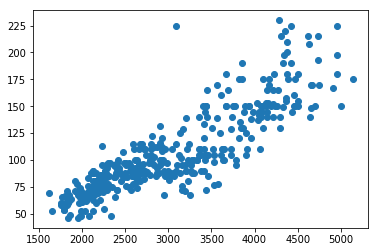

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Get Dataset

df = pd.read_excel('proj1Dataset.xlsx')  #read into dataframe
df.head()

x = np.array(df['Weight'])        #Predictor array
t = np.array(df['Horsepower'])    #Target array

emptyidx = np.argwhere(np.isnan(t))  #Clean up data
t = t[~np.isnan(t)]
x = np.delete(x, emptyidx)

x = np.reshape(x, (len(x),1))
t = np.reshape(t,(len(t),1))

# Normalize and Plot Data
x2 = x/np.mean(x)
plt.scatter(x,t)

In [6]:
# Create Design Matrix

X = np.ones((len(x),1))
X = np.mat(np.hstack((x,X)))
T = np.mat(t)

# Closed Form Solution
    
weights = np.dot(np.linalg.pinv(np.dot(X.T,X)),np.dot(X.T,T))
y = np.dot(X,weights)

    

[[  0.03955133]
 [-13.04012986]]


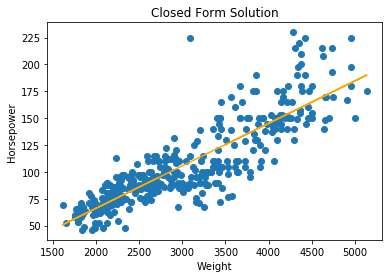

In [7]:
# Plot Closed Form Solution
print(weights)
plt.figure(1)
plt.scatter(x,t)
x3 = np.linspace(1500,5500,500)
plt.plot(x,y,color = 'orange')
plt.title("Closed Form Solution")
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()

In [9]:
#Gradient Descent Solution
x2 = x/np.mean(x)
t2 = t

In [10]:
def guess(w,x):
    return w[0] + w[1]*x

In [11]:
def cost(X,T,w):
    total_error = 0
    n = len(X)
    
    for i in range(n):
        total_error += (T[i] - guess(w,X[i]))**2
    
    return 0.5*total_error

In [12]:
def gradient(T,X,w):
    grad = np.array([0.0,0.0])
    n = len(X)
    for i in range(n):
        grad[0] += -1*(T[i] - guess(w,X[i]))
        grad[1] += -1*(T[i] - guess(w,X[i]))*X[i]        
    return grad

In [13]:
def gradientDescent(X,T,rho,epochs):
    grad = np.array([0.0,0.0])
    w = np.array([1.0,0.0])
    e = []
    
    for i in range(epochs):
        grad = gradient(T,X,w)
        ce = cost(X,T,w)
        print(ce)
        w[0] = w[0] - rho*grad[0]
        w[1] = w[1] - rho*grad[1]
        e.append(ce)
        
    return w,e

In [17]:
w,e = gradientDescent(x2,t2,rho=0.001,epochs=1000)
print(w[0],w[1])
y2 = np.dot(X,w)

[2466485.5]
[217740.7085935]
[140029.68394028]
[135512.47980506]
[133520.44204423]
[131671.19389869]
[129882.67259847]
[128150.35936176]
[126472.40256062]
[124847.09373245]
[123272.78088523]
[121747.86395667]
[120270.79309158]
[118840.06706339]
[117454.2317483]
[116111.87864735]
[114811.6434549]
[113552.20467198]
[112332.28226323]
[111150.63635591]
[110006.06597972]
[108897.40784625]
[107823.5351666]
[106783.35650623]
[105775.81467562]
[104799.88565581]
[103854.57755768]
[102938.92961374]
[102052.01120177]
[101192.92089887]
[100360.78556538]
[99554.7594574]
[98774.02336725]
[98017.78379085]
[97285.27212126]
[96575.74386746]
[95888.47789775]
[95222.77570674]
[94577.96070551]
[93953.37753389]
[93348.39139441]
[92762.38740713]
[92194.76998467]
[91644.96222693]
[91112.40533472]
[90596.55804181]
[90096.89606487]
[89612.91157057]
[89144.11265941]
[88690.02286588]
[88250.18067407]
[87824.13904874]
[87411.46498084]
[87011.73904754]
[86624.55498588]
[86249.51927987]
[85886.25076055]
[85534.3802

[74671.68236127]
[74671.68210238]
[74671.68185162]
[74671.68160872]
[74671.68137344]
[74671.68114555]
[74671.6809248]
[74671.68071099]
[74671.68050388]
[74671.68030327]
[74671.68010895]
[74671.67992073]
[74671.67973842]
[74671.67956182]
[74671.67939077]
[74671.67922509]
[74671.6790646]
[74671.67890915]
[74671.67875857]
[74671.67861272]
[74671.67847145]
[74671.67833461]
[74671.67820206]
[74671.67807367]
[74671.67794931]
[74671.67782886]
[74671.67771218]
[74671.67759916]
[74671.67748969]
[74671.67738365]
[74671.67728094]
[74671.67718145]
[74671.67708509]
[74671.67699175]
[74671.67690133]
[74671.67681376]
[74671.67672893]
[74671.67664676]
[74671.67656717]
[74671.67649008]
[74671.67641541]
[74671.67634308]
[74671.67627302]
[74671.67620515]
[74671.67613942]
[74671.67607575]
[74671.67601408]
[74671.67595434]
[74671.67589648]
[74671.67584043]
[74671.67578614]
[74671.67573355]
[74671.67568262]
[74671.67563328]
[74671.67558549]
[74671.6755392]
[74671.67549436]
[74671.67545093]
[74671.67540886]


[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
[74671.67411016]
-13.040121931280932 118.12262224471868


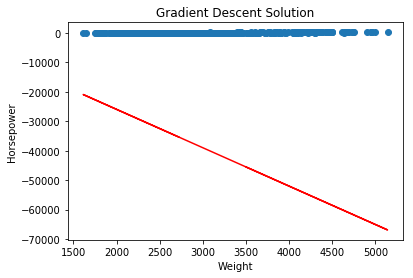

In [15]:
plt.figure(2)
plt.scatter(x,t)
x3 = np.linspace(1500,5500,500)
plt.plot(x,y2.T,color = 'red')
plt.title("Gradient Descent Solution")
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.show()